In [52]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seabotn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [53]:
#read the data 
df = pd.read_csv('superbowl_commercials.csv')

In [54]:
df.head()

,Year,Brand,Superbowl Ads Link,Youtube Link,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
0,2000,E-Trade,https://superbowl-ads.com/2000-etrade-monkey-d...,https://www.youtube.com/watch?v=Muyq2kMDFoA,True,True,False,False,False,True,False,30,2.1,13615.0,84.0,88.47
1,2000,E-Trade,https://superbowl-ads.com/2000-etrade-money-ou...,https://www.youtube.com/watch?v=oftjwYmlfoA,True,True,False,False,True,False,False,30,2.1,72772.0,146.0,88.47
2,2000,Budweiser,https://superbowl-ads.com/2000-budweiser-whaas...,https://www.youtube.com/watch?v=loimTUjV92Q,True,True,False,False,False,False,False,30,2.1,5399.0,11.0,88.47
3,2000,Bud Light,https://superbowl-ads.com/2000-bud-light-hold-...,https://www.youtube.com/watch?v=M3IV93HwSkc,True,True,False,False,True,False,False,30,2.1,6699.0,8.0,88.47
4,2000,Budweiser,https://superbowl-ads.com/2000-budweiser-talki...,https://www.youtube.com/watch?v=dK1tlG778J8,True,False,False,False,False,True,False,30,2.1,18972.0,6.0,88.47


In [55]:
df.columns

Index(['Year', 'Brand', 'Superbowl Ads Link', 'Youtube Link', 'Funny',
       'Shows Product Quickly', 'Patriotic', 'Celebrity', 'Danger', 'Animals',
       'Uses Sex', 'Length', 'Estimated Cost', 'Youtube Views',
       'Youtube Likes', 'TV Viewers'],
      dtype='object')

In [56]:
df.dtypes

Year                       int64
Brand                     object
Superbowl Ads Link        object
Youtube Link              object
Funny                       bool
Shows Product Quickly       bool
Patriotic                   bool
Celebrity                   bool
Danger                      bool
Animals                     bool
Uses Sex                    bool
Length                     int64
Estimated Cost           float64
Youtube Views            float64
Youtube Likes            float64
TV Viewers               float64
dtype: object

In [57]:
df.isnull().sum()

Year                      0
Brand                     0
Superbowl Ads Link        0
Youtube Link              9
Funny                     0
Shows Product Quickly     0
Patriotic                 0
Celebrity                 0
Danger                    0
Animals                   0
Uses Sex                  0
Length                    0
Estimated Cost            0
Youtube Views            12
Youtube Likes            18
TV Viewers                0
dtype: int64

We find few rows with null values for the columns - YouTube Link, YouTube Views, YouTube Likes

In [58]:
df.shape

(249, 16)

In [59]:
df['Brand'].value_counts()

Bud Light    62
Budweiser    43
Doritos      26
Pepsi        25
Hyundai      22
Coca-Cola    21
E-Trade      14
Kia          13
Toyota       12
NFL          11
Name: Brand, dtype: int64

In [60]:
print("The total number of brands under study are {}".format(df['Brand'].nunique()))

The total number of brands under study are 10


In [61]:
print("The number of years under study are {}".format(df['Year'].nunique()))

The number of years under study are 22


Separating the numerical & boolean columns of the dataframe

In [62]:
num_cols = ['Length', 'Estimated Cost', 'Youtube Views',
       'Youtube Likes', 'TV Viewers']

bool_cols = ['Brand', 'Funny',
       'Shows Product Quickly', 'Patriotic', 'Celebrity', 'Danger', 'Animals',
       'Uses Sex',]

In [64]:
df['Year'].value_counts(sort=False)

2000     8
2001    13
2002    10
2003    12
2004    11
2005     8
2006     7
2007    14
2008    13
2009    15
2010    14
2011     9
2012    15
2013    15
2014    14
2015    10
2016    13
2017     5
2018    14
2019    15
2020     9
2021     5
Name: Year, dtype: int64

In [65]:
num_cols_stats = df[num_cols].describe()
num_cols_stats

,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
count,249.000000,249.000000,2.370000e+02,231.000000,249.000000
mean,44.457831,5.156888,1.569672e+06,5086.592713,100.475341
std,21.331845,4.075974,1.229921e+07,28387.597549,12.819811
min,10.000000,0.980000,5.000000e+00,0.000000,84.340000
25%,30.000000,2.400000,7.256000e+03,20.500000,90.750000
50%,30.000000,3.150000,4.730900e+04,146.000000,98.730000
75%,60.000000,5.900000,1.813620e+05,704.500000,111.010000
max,180.000000,31.730000,1.814238e+08,295000.000000,232.000000


In [66]:
round(num_cols_stats.loc['mean'],2)
#Average of the continuous columns 

Length                 44.46
Estimated Cost          5.16
Youtube Views     1569672.10
Youtube Likes        5086.59
TV Viewers            100.48
Name: mean, dtype: float64

Filling the null values with the mean of (Numerical) YouTube Views & Likes 
Filling the null values of(String) YouTube Links - "No Link"

In [67]:
df['Youtube Views'].fillna(df['Youtube Views'].mean(), inplace=True)
df['Youtube Likes'].fillna(df['Youtube Likes'].mean(), inplace=True)
df['Youtube Link'].fillna("No Link", inplace = True)

In [68]:
df.head()

,Year,Brand,Superbowl Ads Link,Youtube Link,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
0,2000,E-Trade,https://superbowl-ads.com/2000-etrade-monkey-d...,https://www.youtube.com/watch?v=Muyq2kMDFoA,True,True,False,False,False,True,False,30,2.1,13615.0,84.0,88.47
1,2000,E-Trade,https://superbowl-ads.com/2000-etrade-money-ou...,https://www.youtube.com/watch?v=oftjwYmlfoA,True,True,False,False,True,False,False,30,2.1,72772.0,146.0,88.47
2,2000,Budweiser,https://superbowl-ads.com/2000-budweiser-whaas...,https://www.youtube.com/watch?v=loimTUjV92Q,True,True,False,False,False,False,False,30,2.1,5399.0,11.0,88.47
3,2000,Bud Light,https://superbowl-ads.com/2000-bud-light-hold-...,https://www.youtube.com/watch?v=M3IV93HwSkc,True,True,False,False,True,False,False,30,2.1,6699.0,8.0,88.47
4,2000,Budweiser,https://superbowl-ads.com/2000-budweiser-talki...,https://www.youtube.com/watch?v=dK1tlG778J8,True,False,False,False,False,True,False,30,2.1,18972.0,6.0,88.47


Export the dataframe to a csv file for Visualisation in BI 

In [69]:
df.to_csv('superbowl_commercials_new.csv', index=False)

In [70]:
#Ignore the columns that has youtube links and superbowl ad links in the dataframe for further analysis 

df1 = df[['Year','Brand','Funny', 'Shows Product Quickly', 'Patriotic', 'Celebrity', 'Danger', 'Animals',
       'Uses Sex', 'Length', 'Estimated Cost', 'Youtube Views', 'Youtube Likes', 'TV Viewers']]

In [71]:
df1.head()

,Year,Brand,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
0,2000,E-Trade,True,True,False,False,False,True,False,30,2.1,13615.0,84.0,88.47
1,2000,E-Trade,True,True,False,False,True,False,False,30,2.1,72772.0,146.0,88.47
2,2000,Budweiser,True,True,False,False,False,False,False,30,2.1,5399.0,11.0,88.47
3,2000,Bud Light,True,True,False,False,True,False,False,30,2.1,6699.0,8.0,88.47
4,2000,Budweiser,True,False,False,False,False,True,False,30,2.1,18972.0,6.0,88.47


In [72]:
brand_stats = round(df1.groupby(['Brand'])[['Length', 'Estimated Cost', 
                                            'Youtube Views', 'Youtube Likes', 'TV Viewers']].mean(),2)

In [73]:
brand_stats.sort_values(by='Estimated Cost', ascending = False)

,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
Brand,,,,,
NFL,79.09,11.74,3849118.11,21605.56,103.59
Kia,65.77,9.00,40913.69,670.66,107.40
Toyota,55.00,8.35,365400.09,2011.22,102.34
Coca-Cola,54.29,6.17,1906345.33,14718.71,104.43
Hyundai,43.64,5.58,59164.55,307.59,107.29
Budweiser,45.00,4.58,1043670.50,3122.34,100.41
Pepsi,46.20,4.51,129962.56,894.46,95.38
Doritos,34.62,4.29,8725446.47,14709.64,104.61
Bud Light,35.32,3.63,410920.22,2230.46,95.49


In [76]:
brand_socials = round(df1.groupby('Brand')['Youtube Views', 'Youtube Likes', 'TV Viewers'].sum(),2)
brand_socials.sort_values(by='Youtube Views', ascending=False)

,Youtube Views,Youtube Likes,TV Viewers
Brand,,,
Doritos,2.268616e+08,382450.59,2719.95
Budweiser,4.487783e+07,134260.47,4317.68
NFL,4.234030e+07,237661.19,1139.53
Coca-Cola,4.003325e+07,309093.00,2193.01
Bud Light,2.547705e+07,138288.56,5920.14
Toyota,4.384801e+06,24134.59,1228.06
Pepsi,3.249064e+06,22361.59,2384.59
E-Trade,1.790945e+06,2826.00,1358.83
Hyundai,1.301620e+06,6767.00,2360.32


* The ads from NFL ran for a longer duration relatively and as expected it costed more and it had the lowest number of TV Viewers (in Millions)

* The ads from E-Trade had an average length of less than a minute and their avg spend was the least

* The ads from Doritos was most popular on Youtube getting the highest number of views & likes whereas the ads from Kia were least popular. 

* Though ads from Kia were less popular in Youtube, it had the highest average number of TV Viewers (in Millions)

* The ads from Bud Light received the highest number of TV Viewers (in Millions)

In [77]:
year_stats = round(df1.groupby(['Year'])[['Length', 'Estimated Cost',
                                          'Youtube Views', 'Youtube Likes', 'TV Viewers']].mean(),2)

In [78]:
year_stats.sort_values(by='Year')

,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
Year,,,,,
2000,37.50,2.62,534728.25,3927.62,88.47
2001,35.77,2.50,152398.93,490.43,84.34
2002,39.00,2.73,242308.61,1429.56,86.80
2003,33.75,2.36,185804.51,916.10,88.64
2004,34.09,2.39,264488.00,625.00,89.80
2005,39.38,3.15,595802.54,1924.72,86.07
2006,34.29,2.74,185852.00,454.14,90.75
2007,38.57,3.09,309124.43,420.86,93.18
2008,39.23,3.14,295019.62,432.00,97.45


* The average spend has increased 5x in the last 20 years whereas the avg run-time has approx. doubled
* 2012 was quite unique which had the highest views on Youtube
* As expected, the decade 2011-21 viewing on socials(Youtube) have become popular whereas the trend of TV viewing has been decreasing steadily

In [98]:
pd.crosstab(df['Brand'], [df['Shows Product Quickly'],df['Funny']]).sort_values(by='Brand', ascending=True)

Shows Product Quickly False       True     
Funny                 False True False True
Brand                                      
Bud Light                 0   11     3   48
Budweiser                 8    8    14   13
Coca-Cola                 2    4    11    4
Doritos                   0    4     1   21
E-Trade                   1    6     0    7
Hyundai                   5    5     5    7
Kia                       5    4     0    4
NFL                       5    0     4    2
Pepsi                     2    8     5   10
Toyota                    2    1     4    5

In [99]:
pd.crosstab(df['Brand'], [df['Danger'],df['Animals']]).sort_values(by='Brand', ascending=True)

Danger    False       True     
Animals   False True False True
Brand                          
Bud Light    24    9    17   12
Budweiser    16   20     3    4
Coca-Cola     7    8     2    4
Doritos      10    4     5    7
E-Trade       8    3     2    1
Hyundai      12    4     3    3
Kia           5    3     3    2
NFL          11    0     0    0
Pepsi        16    3     6    0
Toyota        7    1     2    2

In [105]:
pd.crosstab(df['Brand'], [df['Funny'],df['Uses Sex']]).sort_values(by='Brand', ascending=True)

Funny     False       True     
Uses Sex  False True False True
Brand                          
Bud Light     2    1    36   23
Budweiser    19    3    16    5
Coca-Cola    12    1     8    0
Doritos       1    0    19    6
E-Trade       1    0    10    3
Hyundai      10    0     9    3
Kia           5    0     2    6
NFL           9    0     2    0
Pepsi         6    1     8   10
Toyota        6    0     5    1

In [108]:
pd.crosstab(df['Brand'], [df['Shows Product Quickly'],df['Uses Sex']]).sort_values(by='Brand', ascending=True)

Shows Product Quickly False       True     
Uses Sex              False True False True
Brand                                      
Bud Light                 5    6    33   18
Budweiser                13    3    22    5
Coca-Cola                 6    0    14    1
Doritos                   2    2    18    4
E-Trade                   6    1     5    2
Hyundai                   9    1    10    2
Kia                       7    2     0    4
NFL                       5    0     6    0
Pepsi                     5    5     9    6
Toyota                    3    0     8    1

In [109]:
pd.crosstab(df['Brand'], [df['Celebrity'],df['Patriotic']]).sort_values(by='Brand', ascending=True)

Celebrity False       True     
Patriotic False True False True
Brand                          
Bud Light    47    0    12    3
Budweiser    23   15     4    1
Coca-Cola    11    4     5    1
Doritos      20    1     5    0
E-Trade      11    2     1    0
Hyundai      14    2     5    1
Kia           4    2     7    0
NFL           2    1     5    3
Pepsi         9    0    13    3
Toyota        7    3     2    0

In [119]:
pd.crosstab(df['Brand'], [df['Celebrity'],df['Uses Sex']]).sort_values(by='Brand', ascending=True)

Celebrity False       True     
Uses Sex  False True False True
Brand                          
Bud Light    32   15     6    9
Budweiser    31    7     4    1
Coca-Cola    14    1     6    0
Doritos      16    5     4    1
E-Trade      10    3     1    0
Hyundai      15    1     4    2
Kia           2    4     5    2
NFL           3    0     8    0
Pepsi         5    4     9    7
Toyota        9    1     2    0

In [117]:
pd.crosstab(df['Brand'], [df['Funny'],df['Animals']]).sort_values(by='Brand', ascending=True)

Funny     False       True     
Animals   False True False True
Brand                          
Bud Light     2    1    39   20
Budweiser     8   14    11   10
Coca-Cola     5    8     4    4
Doritos       1    0    14   11
E-Trade       0    1    10    3
Hyundai       8    2     7    5
Kia           4    1     4    4
NFL           9    0     2    0
Pepsi         6    1    16    2
Toyota        6    0     3    3

In [118]:
pd.crosstab(df['Brand'], [df['Funny'],df['Celebrity']]).sort_values(by='Brand', ascending=True)

Funny     False       True     
Celebrity False True False True
Brand                          
Bud Light     2    1    45   14
Budweiser    18    4    20    1
Coca-Cola    12    1     3    5
Doritos       0    1    21    4
E-Trade       1    0    12    1
Hyundai       9    1     7    5
Kia           2    3     4    4
NFL           3    6     0    2
Pepsi         1    6     8   10
Toyota        6    0     4    2

In [126]:
pd.crosstab(df['Brand'], df['Patriotic']).sort_values(by='Brand', ascending=True)

Patriotic,False,True
Brand,,
Bud Light,59,3
Budweiser,27,16
Coca-Cola,16,5
Doritos,25,1
E-Trade,12,2
Hyundai,19,3
Kia,11,2
NFL,7,4
Pepsi,22,3


In [144]:
round(df1.groupby(['Brand', 'Funny', 'Shows Product Quickly', 'Uses Sex',])
      ['Youtube Views', 'Youtube Likes', 'TV Viewers']
      .sum(),2).sort_values(by='Youtube Views', ascending = False).head()

,,,,Youtube Views,Youtube Likes,TV Viewers
Brand,Funny,Shows Product Quickly,Uses Sex,,,
Doritos,True,True,False,198619267.0,348734.00,1820.47
NFL,False,False,False,39936455.1,227564.59,491.77
Budweiser,False,False,False,30666709.1,66764.10,927.79
Coca-Cola,False,True,False,25189439.0,104043.00,1036.30
Doritos,True,False,False,21640962.0,20160.00,202.98


In [145]:
round(df1.groupby(['Brand', 'Danger', 'Animals'])
      ['Youtube Views', 'Youtube Likes', 'TV Viewers']
      .sum(),2).sort_values(by='Youtube Views', ascending = False).head()

,,,Youtube Views,Youtube Likes,TV Viewers
Brand,Danger,Animals,,,
Doritos,False,False,1.868715e+08,311032.00,1030.65
NFL,False,False,4.234030e+07,237661.19,1139.53
Budweiser,True,False,2.891727e+07,48180.00,302.52
Doritos,True,True,2.470827e+07,34076.00,731.84
Coca-Cola,True,True,2.438422e+07,100770.00,412.99


In [156]:
round(df1.groupby(['Brand', 'Celebrity', 'Shows Product Quickly'])
      ['Youtube Views', 'Youtube Likes', 'TV Viewers']
      .sum(),2).sort_values(by='Youtube Views', ascending = False).head()

,,,Youtube Views,Youtube Likes,TV Viewers
Brand,Celebrity,Shows Product Quickly,,,
Doritos,False,True,1.990744e+08,341862.00,1901.72
NFL,True,False,3.984319e+07,227129.59,385.29
Budweiser,False,False,3.343985e+07,74945.69,1369.27
Coca-Cola,False,True,2.518961e+07,104045.00,1036.30
Doritos,True,False,2.154693e+07,20000.00,91.63


Analysing various combinations of the boolean fields -- 
'Funny', 'Shows Product Quickly', 'Patriotic', 'Celebrity', 'Danger', 'Animals','Uses Sex' by 'Brand'

* The ads from the brands Bud Light, Doritos, Budweiser were both funny and was effective in showing products quickly
* The usage of animals/CG images were higher from Budweiser whereas Bud Light's ad included elements of danger mostly
* Bud Light and Pepsi were good in using sex as an element for their ads effectively in combination with fun and showing their products quickly
* Whenever celebrity are in the ads, the usage of sex elements were lower. Bud Light and Pepsi's ads were mostly inclusive of celebrity along with being funny
* Animal/CG elements were mostly funnly for Bud Light, Doritos, Budweiser
* Patriotic elements were usually absent whenever celebrities were used in the Ad
* Budweiser was the top brand to portray Patriotism as an element in their Ads
* Doritos received the highest youtube views with most of their ads being funny and showing product quickly without using elements of sex, danger, animals or including celebrity

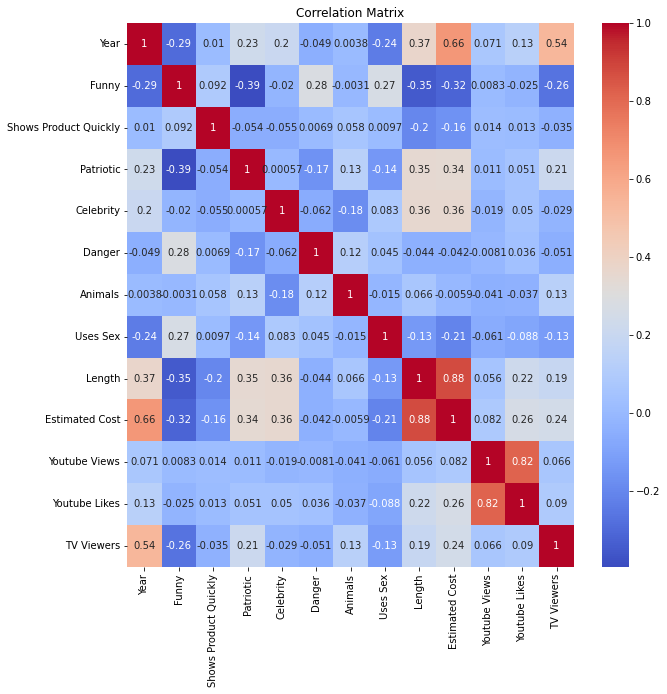

In [174]:
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="coolwarm",annot=True)
plt.title('Correlation Matrix', fontsize=12)
plt.show()

* The correleation between youtube likes and views is higher as expected and also between cost and length. 
* As the length of the ads increased, the cost increased 
* Length & Costs had a +ve correleation with celebrity, patriotism usage and Youtube likes
